# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [8]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
# 設定 data_path
dir_data = '../Part01/'

In [10]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [24]:
#1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
#    * 0 個小孩
#    * 有 1 - 2 個小孩
#    * 有 3 - 5 個小孩
#    * 有超過 5 個小孩
cut_rule = [-1,0,2,5,app_train['CNT_CHILDREN'].max()]
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-1.001, 0.0]    215371
(0.0, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 19.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [25]:
app_train['CNT_CHILDREN_GROUP']

0         (-1.001, 0.0]
1         (-1.001, 0.0]
2         (-1.001, 0.0]
3         (-1.001, 0.0]
4         (-1.001, 0.0]
5         (-1.001, 0.0]
6            (0.0, 2.0]
7         (-1.001, 0.0]
8         (-1.001, 0.0]
9         (-1.001, 0.0]
10           (0.0, 2.0]
11        (-1.001, 0.0]
12        (-1.001, 0.0]
13           (0.0, 2.0]
14        (-1.001, 0.0]
15        (-1.001, 0.0]
16        (-1.001, 0.0]
17           (0.0, 2.0]
18        (-1.001, 0.0]
19           (0.0, 2.0]
20        (-1.001, 0.0]
21           (0.0, 2.0]
22           (0.0, 2.0]
23        (-1.001, 0.0]
24           (0.0, 2.0]
25        (-1.001, 0.0]
26        (-1.001, 0.0]
27           (0.0, 2.0]
28        (-1.001, 0.0]
29        (-1.001, 0.0]
              ...      
307481    (-1.001, 0.0]
307482    (-1.001, 0.0]
307483    (-1.001, 0.0]
307484    (-1.001, 0.0]
307485       (0.0, 2.0]
307486       (0.0, 2.0]
307487    (-1.001, 0.0]
307488    (-1.001, 0.0]
307489    (-1.001, 0.0]
307490    (-1.001, 0.0]
307491       (0.

In [27]:
#2-1 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot

grp = app_train['CNT_CHILDREN_GROUP']
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP
(-1.001, 0.0]    166288.713566
(0.0, 2.0]       174725.712648
(2.0, 5.0]       173626.303191
(5.0, 19.0]      147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

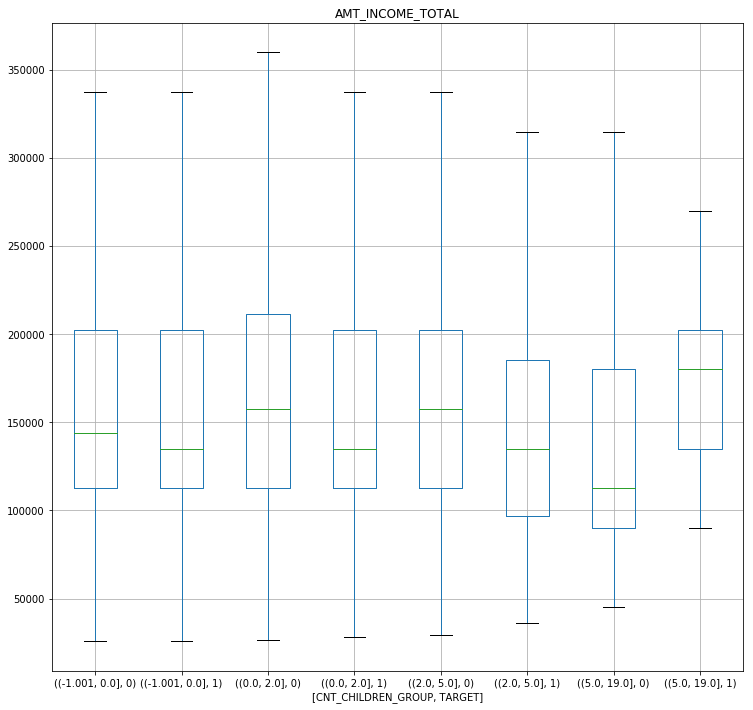

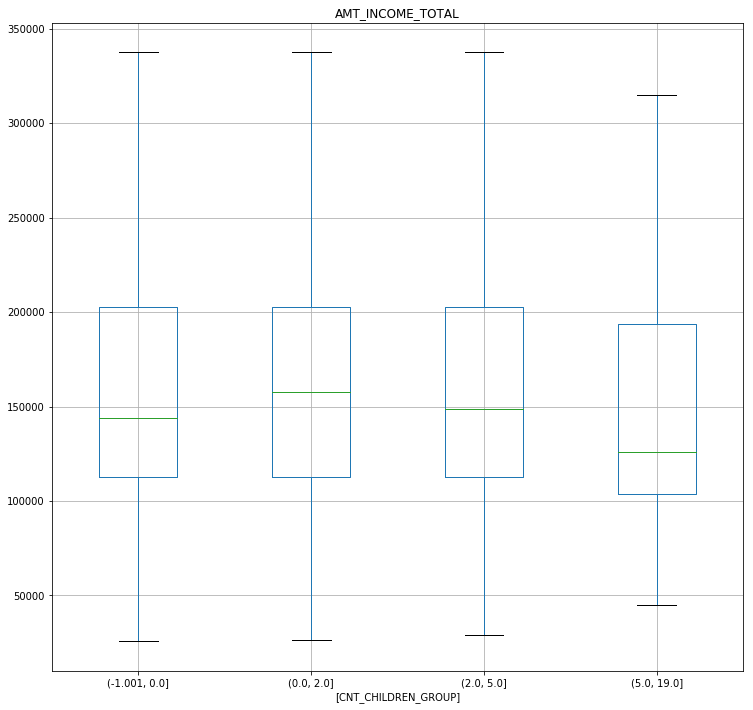

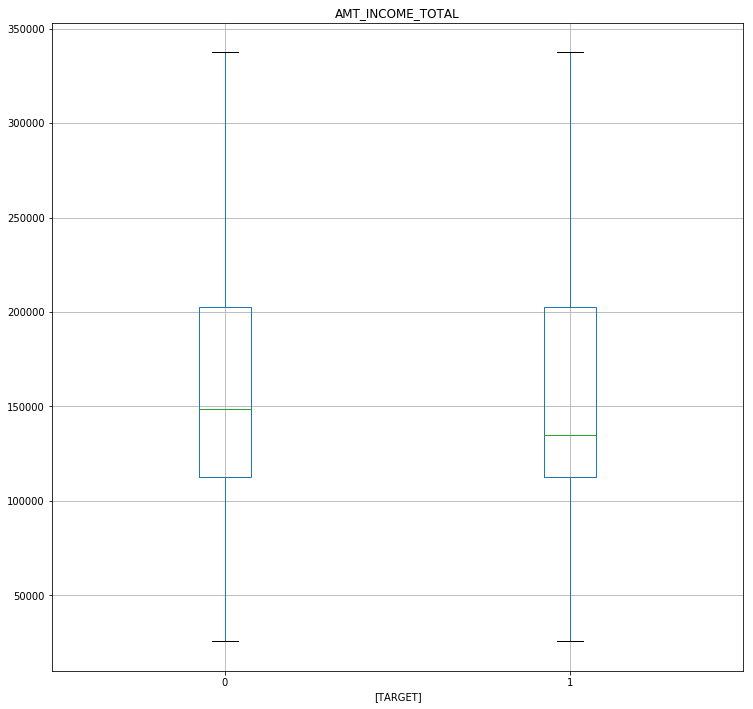

In [37]:
#2-2 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['CNT_CHILDREN_GROUP','TARGET']
app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['CNT_CHILDREN_GROUP']
app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['TARGET']
app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()


# https://zh.wikipedia.org/wiki/標準分數
標準分數（Standard Score，又稱z-score，中文稱為Z-分數或標準化值）在統計學中是一種無因次值，就是一種純數字標記，是藉由從單一（原始）分數中減去母體的平均值，再依照母體（母集合）的標準差分割成不同的差距，按照z值公式，各個樣本在經過轉換後，通常在正、負五到六之間不等。 
數理統計學中的標準化[編輯]
在數理統計學中，隨機變數「X」是使用理論（母體）的平均值和標準差所標準化的結果： 
Z = X − μ σ {\displaystyle Z={X-\mu \over \sigma }} 

其中 μ = E(X) 為平均值、σ² = Var(X) 為X的機率分布之方差 
若隨機變數無法確定時，則為算術平均數： 
X ¯ = 1 n ∑ i = 1 n X i {\displaystyle {\bar {X}}={1 \over n}\sum _{i=1}^{n}X_{i}} 

因此經過標準化的結果為： 
Z = X ¯ − μ σ / n . {\displaystyle Z={{\bar {X}}-\mu \over \sigma /{\sqrt {n}}}.} 
標準分數可藉由以下公式求出： 
z = x − μ/ σ {\displaystyle z={x-\mu \over \sigma }} 


In [40]:
#3 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數
#x 是需要被標準化的原始分數
#μ是母體的平均值
#σ是母體的標準差
#標準分數可藉由以下公式求出：公式: z = x − μ/ σ
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:(x-np.mean(x))/np.std(x))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.345857
1,270000.0,0.990556
2,67500.0,-0.943540
3,135000.0,-0.298841
4,121500.0,-0.427781
